In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

In [10]:
image = cv2.imread("ImagePreProcessingFinal.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

In [11]:
ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)

In [12]:
dilate = cv2.dilate(thresh1, None, iterations=2)

In [13]:
cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[1] if imutils.is_cv2() else cnts[0]

In [14]:
sorted_ctrs = sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[0] + cv2.boundingRect(ctr)[1] * image.shape[1] )

In [15]:
orig = image.copy()
i = 0
for cnt in sorted_ctrs:
    # Check the area of contour, if it is very small ignore it
    if(cv2.contourArea(cnt) < 200):
        continue

    # Filtered countours are detected
    x,y,w,h = cv2.boundingRect(cnt)
    
    # Taking ROI of the cotour
    roi = image[y:y+h, x:x+w]
    
    # Mark them on the image if you want
    cv2.rectangle(orig,(x,y),(x+w,y+h),(0,255,0),2)

    # Save your contours or characters
    cv2.imwrite("Images/roi" + str(i) + ".png", roi)

    i = i + 1 

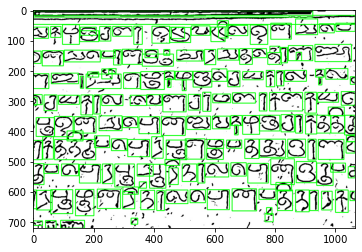

In [16]:
cv2.imwrite("box.jpg",orig)
plt.imshow(orig)